In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

In [5]:
import hickle as hkl
data_path = get_data_dir_path()
run_name = "test_run"

In [6]:
madness_results=[]
scarlet_results=[]

actual_photometry = []
madness_photometry = []
scarlet_photometry = []
blended_photometry = []

for file_num in range(15):

    madness_results.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_reconstruction", str(file_num) + ".hkl")))
    scarlet_results.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_reconstruction", str(file_num) + ".hkl")))

    actual_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "actual_photometry", str(file_num) + ".hkl")))
    madness_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_photometry", str(file_num) + ".hkl")))
    scarlet_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_photometry", str(file_num) + ".hkl")))
    blended_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "blended_photometry",  str(file_num) + ".hkl")))


        
madness_results = vstack(madness_results)
scarlet_results = vstack(scarlet_results)

actual_photometry = vstack(actual_photometry)
madness_photometry = vstack(madness_photometry)
scarlet_photometry = vstack(scarlet_photometry)
blended_photometry = vstack(blended_photometry)

In [7]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [8]:
scarlet_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,IDENT_1,ra,dec,ref_mag,BAND,WEIGHT,GAL_FILENAME,PSF_FILENAME,GAL_HDU,PSF_HDU,PIXEL_SCALE,NOISE_MEAN,NOISE_VARIANCE,NOISE_FILENAME,stamp_flux,IDENT_2,mag_auto,flux_radius,zphot,sersicfit,bulgefit,fit_status,fit_mad_s,fit_mad_b,fit_dvc_btt,use_bulgefit,viable_sersic,hlr,flux,btk_size,btk_index,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int32,float64,float64,float64,bytes5,float64,bytes32,bytes36,int32,int32,float64,float64,float64,bytes26,float64,int32,float64,float64,float64,float64[8],float64[16],int32[5],float64,float64,float64,int32,int32,float64[3],float64[4],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9996194834810224,8019.623776606022,7258.537010172482,0.054200067329570834,0.9995408462107935,63541.61405108601,62368.80589579402,0.04691214804794841,0.9993837839791451,126119.21168519999,124413.07651855025,0.038946416926827654,0.9992978529031247,93920.59779829171,92271.39384126775,0.036775366817487054,0.9991977085388262,57022.56639733596,61263.53442730324,0.03458912895876143,0.9991438493578433,26547.982953148865,26245.15078535106,0.03392048059767794,0,0.1207228776650977,0,0,114656,12.312215341975133,1.1502970222887008,24.70199966430664,F814W,0.6725800037384033,real_galaxy_images_25.2_n76.fits,real_galaxy_PSF_images_25.2_n76.fits,876,876,0.029999999329447746,-5.195139965508133e-05,7.092030045896536e-06,acs_I_unrot_sci_20_cf.fits,3.378310085448902,114656,24.701932907104492,4.0240960121154785,4.184000015258789,0.05582879926581247 .. 0.7416622479436635,0.002805854688621419 .. 0.7734060231603443,1 .. 1,0.0023845385486783383,0.002530654272385994,0.8283721232425767,0,1,0.04947354509421889 .. 0.0,3.5658033527706183 .. 0.0,0.1207228776650977,70480,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.09490305126952464,-0.01845732395700681,-0.013527956160305984,-0.017559555578701338,0.07437350329720359,-0.01140697462147069
0.999614102487352,6284.826988666501,6158.172263811799,0.0023850096083715133,0.9995269016754171,49801.08697871733,49793.68067148186,0.002161485659133988,0.9993716360234668,98849.0633842485,94319.07782442194,0.001902481750660212,0.999293565655184,73612.07013379307,75349.60742675196,0.0018699296665447562,0.9992046953591506,44691.38578954199,44537.49463162999,0.0018218451051663642,0.9991584179049015,20806.753059104212,26079.678230163987,0.001833733532085824,1,0.15037184379163726,0,0,546191,14.544104257126662,7.114506678623506,24.965999603271484,F814W,0.6588799953460693,real_galaxy_images_25.2_n72.fits,real_galaxy_PSF_images_25.2_n72.fits,888,888,0.029999999329447746,3.3804801205405965e-05,8.221810276154429e-06,acs_I_unrot_sci_20_cf.fits,2.4911146558297332,546191,24.965761184692383,5.012394905090332,0.375900000333786,0.01422813354711827 .. 1.8304365778323326,0.009947950907802027 .. 1.5667242916287258,1 .. 1,0.0019036333782279018,0.0019960239457415523,0.1616823627094316,0,1,0.10823319600470133 .. 0.0,2.7355360417373484 .. 0.0,0.15037184379163726,66808,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,-0.020152460057070793,-0.00014871778277920713,-0.0458272987597008,0.02360397268818611,-0.0034434187974545735,0.25342373969073234
0.9975789065726511,9362.63658057979,9492.27

In [9]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3916.4374367523196,210.45616053661274,0,35936.53955322266,828.5196280490283,0,73757.40019775392,1894.2986145932748,0,56240.87865875244,2273.262043848003,0,37970.12975830078,2660.0568508962365,0,15457.53175857544,2852.200610931847,0,0,0,0
3494.0216317939767,210.30748078613226,0,28736.957354125978,827.934308563714,0,58286.24661254883,1892.9603603714213,0,45807.82450073243,2271.6560655169615,0,27998.883105773933,2658.1776158676835,0,15965.437683258058,2850.1856332088273,0,1,0,0
3409.2538038635253,210.6047353242933,0,29520.17155517578,829.1045343188789,0,61650.428880615225,1895.635924053588,0,48846.78306762696,2274.866888413474,0,29897.53488830567,2661.93475924937,0,15049.554824676512,2854.214166149766,0,2,0,0
3552.6983613586435,210.60473532429333,0,26659.916115722666,829.104534318879,0,59190.44844970704,1895.635924053588,0,39256.43295806886,2274.866888413474,0,23663.387743682866,2661.93475924937,0,12578.75387203217,2854.214166149766,0,3,0,0
3638.5428183174135,210.45616053661274,0,31418.17266845703,828.5196280490281,0,63841.98066406251,1894.298614593275,0,47188.2073210144,2273.2620438480035,0,32040.15470529557,2660.0568508962365,0,13188.755957546236,2852.200610931847,0,4,0,0
19083.540585937506,210.75320537116096,0,157706.29288085943,829.6890282471801,0,328558.02421875007,1896.9722907504477,0,248794.23324218747,2276.4706016111877,0,150052.17448242186,2663.8113437328852,0,69027.10406982424,2856.2263018710546,0,5,0,0
4600.199972076415,209.26376476157427,0,39172.25447631837,823.8254280716882,0,84147.71477539065,1883.5659581628672,0,64946.523459472664,2260.382268555476,0,39704.407303466796,2644.9855859720674,0,19039.627778854374,2836.04070404499,0,6,0,0
16018.25002197266,210.30748078613226,0,129422.75599609377,827.9343085637139,0,271371.22708984383,1892.9603603714213,0,211064.70054687504,2271.6560655169615,0,127203.63611816407,2658.1776158676835,0,57431.268077087414,2850.1856332088273,0,7,0,0
2770.793513946534,210.6047353242933,0,23388.03196044922,829.104534318879,0,48169.88163909913,1895.6359240535878,0,36717.303012542725,2274.866888413474,0,22725.593482055665,2661.9347592493705,0,9105.399078714849,2854.214166149766,0,8,0,0


### Plot the correlations

(0.98, 1.0)

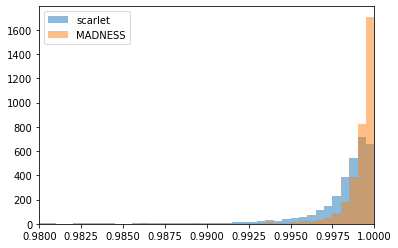

In [10]:
bins = np.arange(0.95, 1, 0.0005)
plt.hist(scarlet_results['r_covariance'], bins=bins, alpha=0.5, label="scarlet")
plt.hist(madness_results['r_covariance'], bins=bins, alpha=0.5, label="MADNESS")
plt.legend()
plt.xlim([0.98, 1])

### Plot the relative flux error

In [11]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [12]:
from scipy.optimize import curve_fit
from scipy.stats import norm

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.05207468160898217
Madness sig: 0.036020590856250846
Scarlet mu: 0.003713338514051241
Scarlet sig: 0.06132407134510804


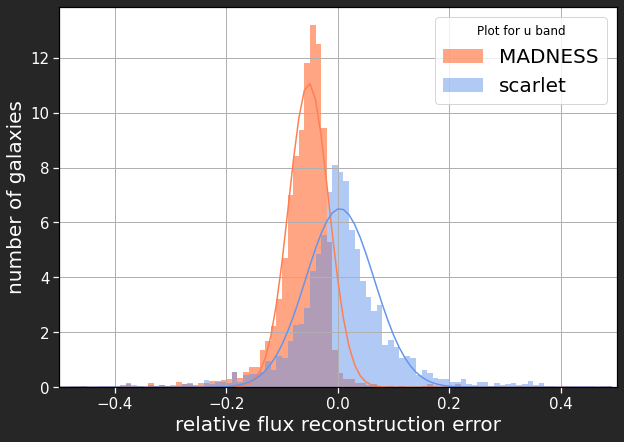

Madness mu: -0.016249856432609424
Madness sig: 0.02855292215058268
Scarlet mu: 0.007145345891929257
Scarlet sig: 0.039233799371792465


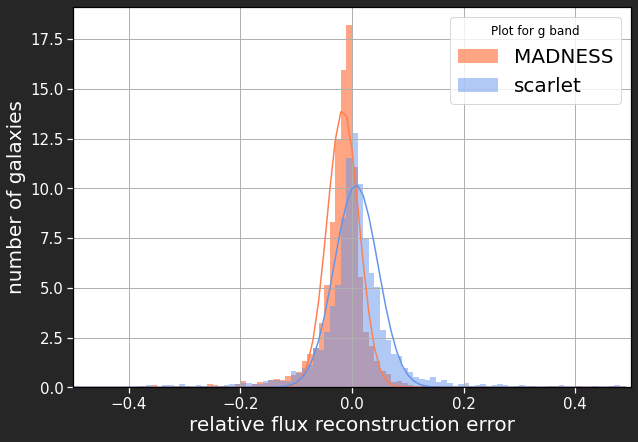

Madness mu: -0.00858650667579286
Madness sig: 0.03237022329044742
Scarlet mu: 0.006881121865515605
Scarlet sig: 0.04153108971067185


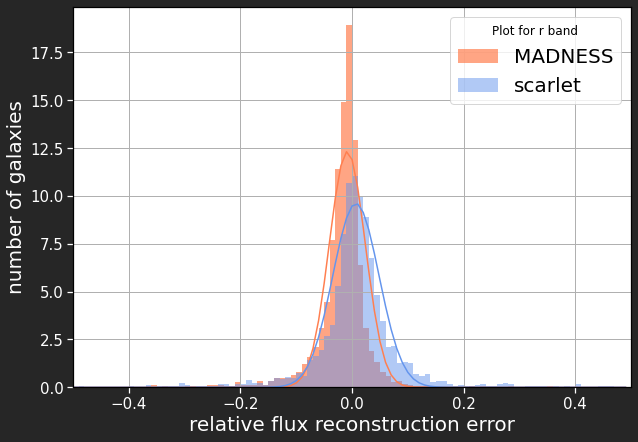

Madness mu: -0.014378284591714426
Madness sig: 0.032049696855848436
Scarlet mu: 0.007036658025135598
Scarlet sig: 0.06007237768935261


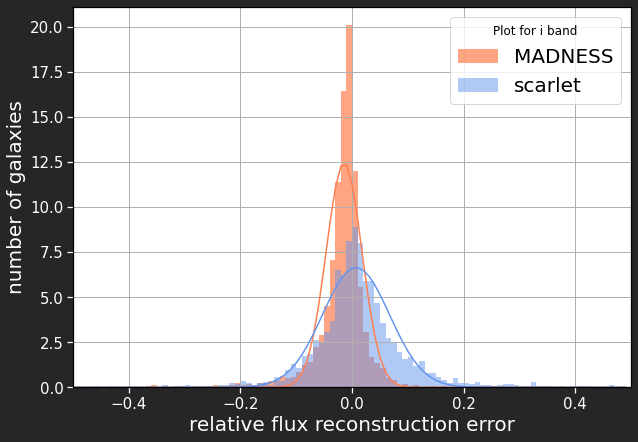

Madness mu: -0.019162494076698528
Madness sig: 0.02655305890661976
Scarlet mu: 0.010490820072796515
Scarlet sig: 0.07967138229851291


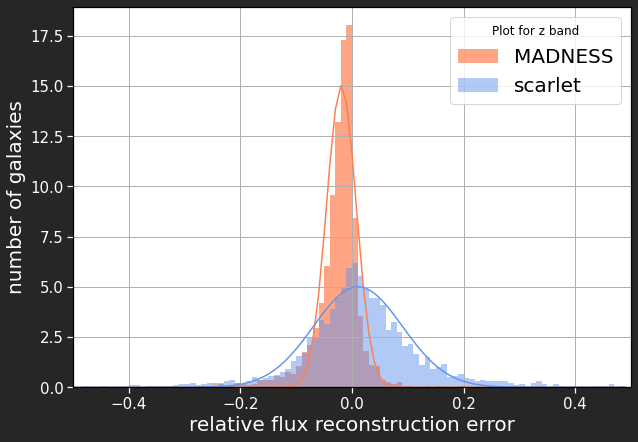

Madness mu: -0.01470394423779982
Madness sig: 0.029411934219214893
Scarlet mu: 0.008654045793155938
Scarlet sig: 0.13604683792301914


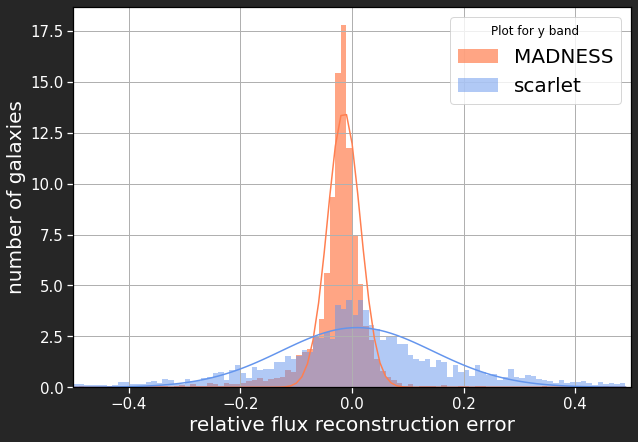

In [13]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].value
    madness_predicted_flux = madness_results[band+"_predicted_flux"].value

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
    sns.set_theme(style={"axes.grid": True,
                     'axes.labelcolor': 'white',
                     'figure.facecolor': '.15',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'text.color': 'black',
                     'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-0.5, 0.5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-.5, .5])
    plt.show()

# Compare apperture photometry

In [14]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3916.4374367523196,210.45616053661274,0,35936.53955322266,828.5196280490283,0,73757.40019775392,1894.2986145932748,0,56240.87865875244,2273.262043848003,0,37970.12975830078,2660.0568508962365,0,15457.53175857544,2852.200610931847,0,0,0,0
3494.0216317939767,210.30748078613226,0,28736.957354125978,827.934308563714,0,58286.24661254883,1892.9603603714213,0,45807.82450073243,2271.6560655169615,0,27998.883105773933,2658.1776158676835,0,15965.437683258058,2850.1856332088273,0,1,0,0
3409.2538038635253,210.6047353242933,0,29520.17155517578,829.1045343188789,0,61650.428880615225,1895.635924053588,0,48846.78306762696,2274.866888413474,0,29897.53488830567,2661.93475924937,0,15049.554824676512,2854.214166149766,0,2,0,0
3552.6983613586435,210.60473532429333,0,26659.916115722666,829.104534318879,0,59190.44844970704,1895.635924053588,0,39256.43295806886,2274.866888413474,0,23663.387743682866,2661.93475924937,0,12578.75387203217,2854.214166149766,0,3,0,0
3638.5428183174135,210.45616053661274,0,31418.17266845703,828.5196280490281,0,63841.98066406251,1894.298614593275,0,47188.2073210144,2273.2620438480035,0,32040.15470529557,2660.0568508962365,0,13188.755957546236,2852.200610931847,0,4,0,0
19083.540585937506,210.75320537116096,0,157706.29288085943,829.6890282471801,0,328558.02421875007,1896.9722907504477,0,248794.23324218747,2276.4706016111877,0,150052.17448242186,2663.8113437328852,0,69027.10406982424,2856.2263018710546,0,5,0,0
4600.199972076415,209.26376476157427,0,39172.25447631837,823.8254280716882,0,84147.71477539065,1883.5659581628672,0,64946.523459472664,2260.382268555476,0,39704.407303466796,2644.9855859720674,0,19039.627778854374,2836.04070404499,0,6,0,0
16018.25002197266,210.30748078613226,0,129422.75599609377,827.9343085637139,0,271371.22708984383,1892.9603603714213,0,211064.70054687504,2271.6560655169615,0,127203.63611816407,2658.1776158676835,0,57431.268077087414,2850.1856332088273,0,7,0,0
2770.793513946534,210.6047353242933,0,23388.03196044922,829.104534318879,0,48169.88163909913,1895.6359240535878,0,36717.303012542725,2274.866888413474,0,22725.593482055665,2661.9347592493705,0,9105.399078714849,2854.214166149766,0,8,0,0


In [15]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3951.901672668458,210.45616053661274,0,35813.383845214856,828.5196280490283,0,73403.56010498048,1894.2986145932748,0,56065.28520526886,2273.262043848003,0,37946.01704223633,2660.0568508962365,0,15565.123474731447,2852.200610931847,0,0,0,0
3496.929705753327,210.30748078613226,0,28759.49813659668,827.934308563714,0,58329.724863281255,1892.9603603714213,0,45840.79804199219,2271.6560655169615,0,28019.135358276373,2658.1776158676835,0,15975.078921585084,2850.1856332088273,0,1,0,0
3415.475267639161,210.6047353242933,0,29561.833563232423,829.1045343188789,0,61709.836838378906,1895.635924053588,0,48896.01762695314,2274.866888413474,0,29924.692392578127,2661.93475924937,0,15068.992263946533,2854.214166149766,0,2,0,0
3561.020744323732,210.60473532429333,0,26688.943754882817,829.104534318879,0,59261.93634765626,1895.635924053588,0,39317.25695220947,2274.866888413474,0,23702.458093719488,2661.93475924937,0,12596.906660919196,2854.214166149766,0,3,0,0
3640.9825058555607,210.45616053661274,0,31435.45247680665,828.5196280490281,0,63875.367148437515,1894.298614593275,0,47213.671943817135,2273.2620438480035,0,32055.1473406601,2660.0568508962365,0,13193.015786323549,2852.200610931847,0,4,0,0
19086.568085937506,210.75320537116096,0,157728.32238281248,829.6890282471801,0,328603.5535546876,1896.9722907504477,0,248826.7353515625,2276.4706016111877,0,150071.9850390625,2663.8113437328852,0,69036.83207397461,2856.2263018710546,0,5,0,0
4608.791352748871,209.26376476157427,0,39199.69264770509,823.8254280716882,0,84206.17402343749,1883.5659581628672,0,64987.13789062501,2260.382268555476,0,39709.082950439464,2644.9855859720674,0,19037.70110427857,2836.04070404499,0,6,0,0
16024.96980712891,210.30748078613226,0,129475.17539550785,827.9343085637139,0,271473.2430859376,1892.9603603714213,0,211141.19308593753,2271.6560655169615,0,127250.25895507814,2658.1776158676835,0,57453.19896728518,2850.1856332088273,0,7,0,0
2457.1592723226554,210.6047353242933,0,20488.135008544927,829.104534318879,0,42076.359024963385,1895.6359240535878,0,32140.503522033694,2274.866888413474,0,19935.971876678468,2661.9347592493705,0,7638.810624961857,2854.214166149766,0,8,0,0


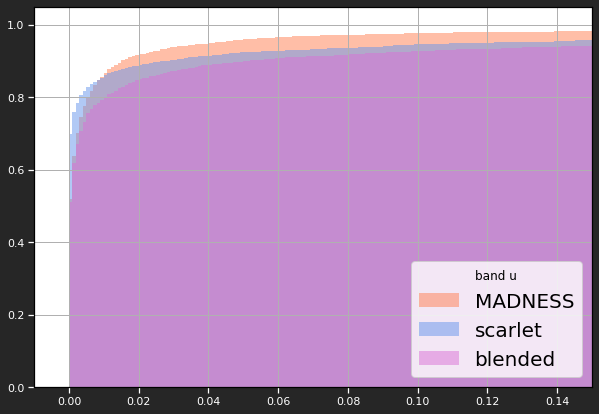

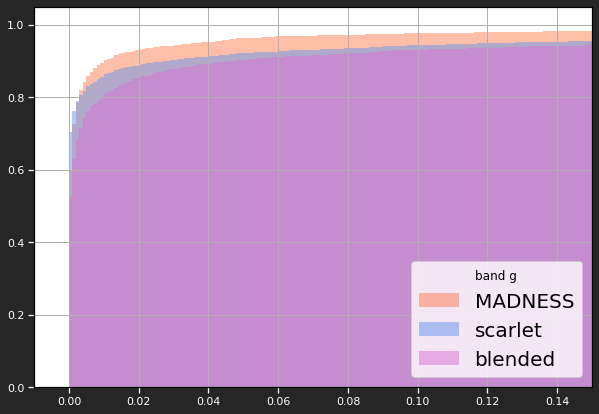

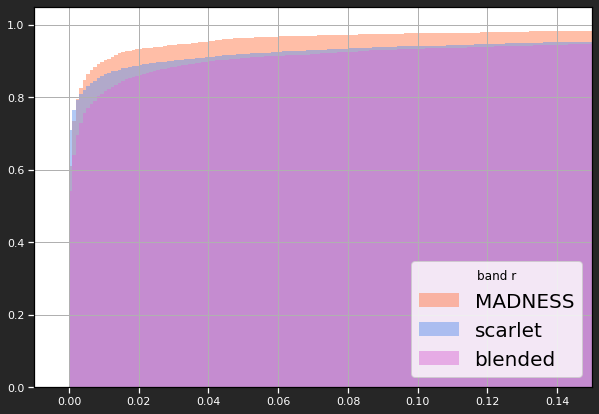

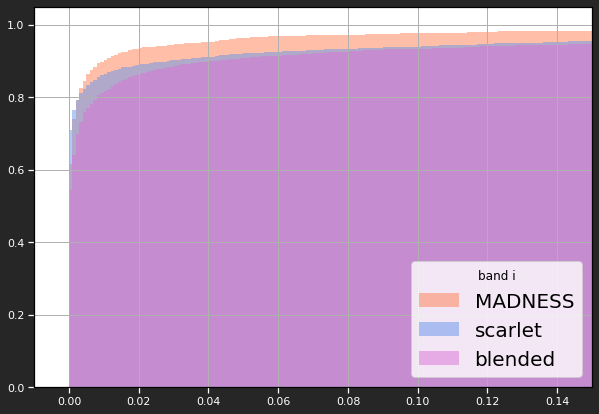

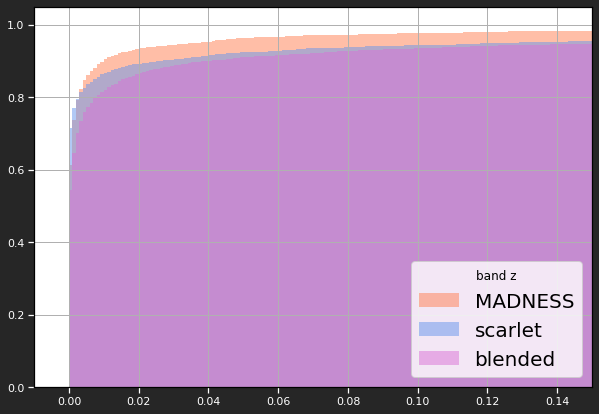

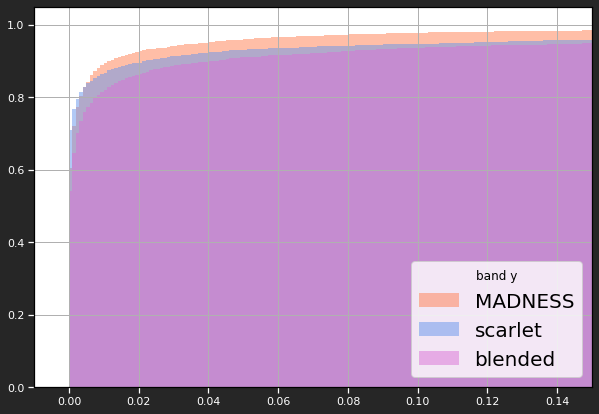

In [16]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure(figsize=(10, 7))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        density=True,
        alpha=0.5,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    plt.xlim([-.01, .15])

    plt.legend(fontsize=20, title="band " + band, loc="lower right")
    plt.show()

# error variation plots

/tmp/ipykernel_10628/4022407744.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
/tmp/ipykernel_10628/4022407744.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h[3])


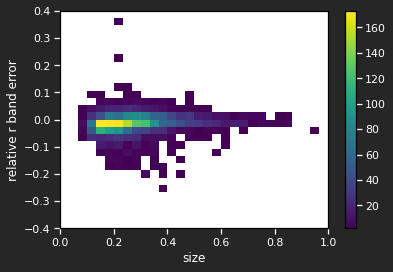

In [17]:
h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

In [18]:
madness_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,IDENT_1,ra,dec,ref_mag,BAND,WEIGHT,GAL_FILENAME,PSF_FILENAME,GAL_HDU,PSF_HDU,PIXEL_SCALE,NOISE_MEAN,NOISE_VARIANCE,NOISE_FILENAME,stamp_flux,IDENT_2,mag_auto,flux_radius,zphot,sersicfit,bulgefit,fit_status,fit_mad_s,fit_mad_b,fit_dvc_btt,use_bulgefit,viable_sersic,hlr,flux,btk_size,btk_index,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int32,float64,float64,float64,bytes5,float64,bytes32,bytes36,int32,int32,float64,float64,float64,bytes26,float64,int32,float64,float64,float64,float64[8],float64[16],int32[5],float64,float64,float64,int32,int32,float64[3],float64[4],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.998093918572873,8019.623776606022,7085.883155814372,0.054200067329570834,0.9992031244219812,63541.61405108601,58760.16547437757,0.04691214804794841,0.9991806268282102,126119.21168519999,116878.52636445314,0.038946416926827654,0.9990962265240216,93920.59779829171,87758.96279141307,0.036775366817487054,0.9987127515847837,57022.56639733596,52785.73143761605,0.03458912895876143,0.9974449296222554,26547.982953148865,25332.945878617465,0.03392048059767794,0,0.1207228776650977,0,0,114656,12.312215341975133,1.1502970222887008,24.70199966430664,F814W,0.6725800037384033,real_galaxy_images_25.2_n76.fits,real_galaxy_PSF_images_25.2_n76.fits,876,876,0.029999999329447746,-5.195139965508133e-05,7.092030045896536e-06,acs_I_unrot_sci_20_cf.fits,3.378310085448902,114656,24.701932907104492,4.0240960121154785,4.184000015258789,0.05582879926581247 .. 0.7416622479436635,0.002805854688621419 .. 0.7734060231603443,1 .. 1,0.0023845385486783383,0.002530654272385994,0.8283721232425767,0,1,0.04947354509421889 .. 0.0,3.5658033527706183 .. 0.0,0.1207228776650977,70480,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.116431973219923,-0.07524908909087932,-0.07326945036583384,-0.06560472517553241,-0.07430102198833781,-0.04576758530678819
0.9977897475006493,6284.826988666501,5749.278844814398,0.0023850096083715133,0.9995225874581803,49801.08697871733,48772.27107528597,0.002161485659133988,0.999469831468835,98849.0633842485,96811.65509857237,0.001902481750660212,0.9992942291072417,73612.07013379307,72653.0858874321,0.0018699296665447562,0.999169890302267,44691.38578954199,43419.705911073834,0.0018218451051663642,0.9976401930597415,20806.753059104212,20872.71615397185,0.001833733532085824,1,0.15037184379163726,0,0,546191,14.544104257126662,7.114506678623506,24.965999603271484,F814W,0.6588799953460693,real_galaxy_images_25.2_n72.fits,real_galaxy_PSF_images_25.2_n72.fits,888,888,0.029999999329447746,3.3804801205405965e-05,8.221810276154429e-06,acs_I_unrot_sci_20_cf.fits,2.4911146558297332,546191,24.965761184692383,5.012394905090332,0.375900000333786,0.01422813354711827 .. 1.8304365778323326,0.009947950907802027 .. 1.5667242916287258,1 .. 1,0.0019036333782279018,0.0019960239457415523,0.1616823627094316,0,1,0.10823319600470133 .. 0.0,2.7355360417373484 .. 0.0,0.15037184379163726,66808,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,-0.08521286979225726,-0.02065850297345971,-0.020611305923620742,-0.013027540790769407,-0.028454697834984992,0.0031702733569366668
0.9963471310215145,9362.63658057979,8413.94473

In [19]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3951.901672668458,210.45616053661274,0,35813.383845214856,828.5196280490283,0,73403.56010498048,1894.2986145932748,0,56065.28520526886,2273.262043848003,0,37946.01704223633,2660.0568508962365,0,15565.123474731447,2852.200610931847,0,0,0,0
3496.929705753327,210.30748078613226,0,28759.49813659668,827.934308563714,0,58329.724863281255,1892.9603603714213,0,45840.79804199219,2271.6560655169615,0,28019.135358276373,2658.1776158676835,0,15975.078921585084,2850.1856332088273,0,1,0,0
3415.475267639161,210.6047353242933,0,29561.833563232423,829.1045343188789,0,61709.836838378906,1895.635924053588,0,48896.01762695314,2274.866888413474,0,29924.692392578127,2661.93475924937,0,15068.992263946533,2854.214166149766,0,2,0,0
3561.020744323732,210.60473532429333,0,26688.943754882817,829.104534318879,0,59261.93634765626,1895.635924053588,0,39317.25695220947,2274.866888413474,0,23702.458093719488,2661.93475924937,0,12596.906660919196,2854.214166149766,0,3,0,0
3640.9825058555607,210.45616053661274,0,31435.45247680665,828.5196280490281,0,63875.367148437515,1894.298614593275,0,47213.671943817135,2273.2620438480035,0,32055.1473406601,2660.0568508962365,0,13193.015786323549,2852.200610931847,0,4,0,0
19086.568085937506,210.75320537116096,0,157728.32238281248,829.6890282471801,0,328603.5535546876,1896.9722907504477,0,248826.7353515625,2276.4706016111877,0,150071.9850390625,2663.8113437328852,0,69036.83207397461,2856.2263018710546,0,5,0,0
4608.791352748871,209.26376476157427,0,39199.69264770509,823.8254280716882,0,84206.17402343749,1883.5659581628672,0,64987.13789062501,2260.382268555476,0,39709.082950439464,2644.9855859720674,0,19037.70110427857,2836.04070404499,0,6,0,0
16024.96980712891,210.30748078613226,0,129475.17539550785,827.9343085637139,0,271473.2430859376,1892.9603603714213,0,211141.19308593753,2271.6560655169615,0,127250.25895507814,2658.1776158676835,0,57453.19896728518,2850.1856332088273,0,7,0,0
2457.1592723226554,210.6047353242933,0,20488.135008544927,829.104534318879,0,42076.359024963385,1895.6359240535878,0,32140.503522033694,2274.866888413474,0,19935.971876678468,2661.9347592493705,0,7638.810624961857,2854.214166149766,0,8,0,0


In [20]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
3916.4374367523196,210.45616053661274,0,35936.53955322266,828.5196280490283,0,73757.40019775392,1894.2986145932748,0,56240.87865875244,2273.262043848003,0,37970.12975830078,2660.0568508962365,0,15457.53175857544,2852.200610931847,0,0,0,0
3494.0216317939767,210.30748078613226,0,28736.957354125978,827.934308563714,0,58286.24661254883,1892.9603603714213,0,45807.82450073243,2271.6560655169615,0,27998.883105773933,2658.1776158676835,0,15965.437683258058,2850.1856332088273,0,1,0,0
3409.2538038635253,210.6047353242933,0,29520.17155517578,829.1045343188789,0,61650.428880615225,1895.635924053588,0,48846.78306762696,2274.866888413474,0,29897.53488830567,2661.93475924937,0,15049.554824676512,2854.214166149766,0,2,0,0
3552.6983613586435,210.60473532429333,0,26659.916115722666,829.104534318879,0,59190.44844970704,1895.635924053588,0,39256.43295806886,2274.866888413474,0,23663.387743682866,2661.93475924937,0,12578.75387203217,2854.214166149766,0,3,0,0
3638.5428183174135,210.45616053661274,0,31418.17266845703,828.5196280490281,0,63841.98066406251,1894.298614593275,0,47188.2073210144,2273.2620438480035,0,32040.15470529557,2660.0568508962365,0,13188.755957546236,2852.200610931847,0,4,0,0
19083.540585937506,210.75320537116096,0,157706.29288085943,829.6890282471801,0,328558.02421875007,1896.9722907504477,0,248794.23324218747,2276.4706016111877,0,150052.17448242186,2663.8113437328852,0,69027.10406982424,2856.2263018710546,0,5,0,0
4600.199972076415,209.26376476157427,0,39172.25447631837,823.8254280716882,0,84147.71477539065,1883.5659581628672,0,64946.523459472664,2260.382268555476,0,39704.407303466796,2644.9855859720674,0,19039.627778854374,2836.04070404499,0,6,0,0
16018.25002197266,210.30748078613226,0,129422.75599609377,827.9343085637139,0,271371.22708984383,1892.9603603714213,0,211064.70054687504,2271.6560655169615,0,127203.63611816407,2658.1776158676835,0,57431.268077087414,2850.1856332088273,0,7,0,0
2770.793513946534,210.6047353242933,0,23388.03196044922,829.104534318879,0,48169.88163909913,1895.6359240535878,0,36717.303012542725,2274.866888413474,0,22725.593482055665,2661.9347592493705,0,9105.399078714849,2854.214166149766,0,8,0,0


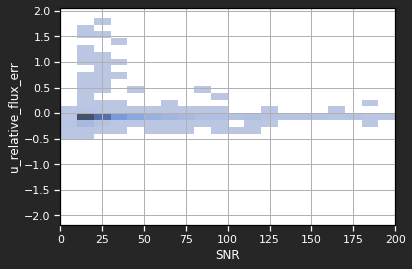

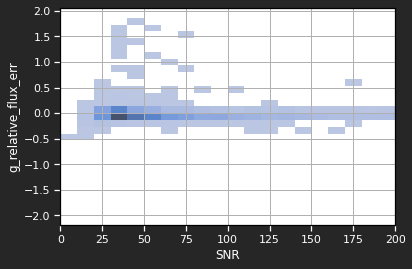

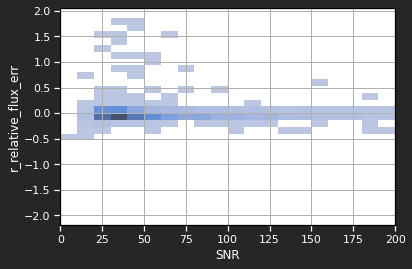

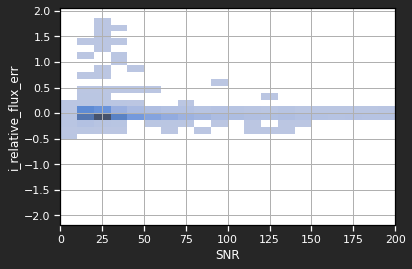

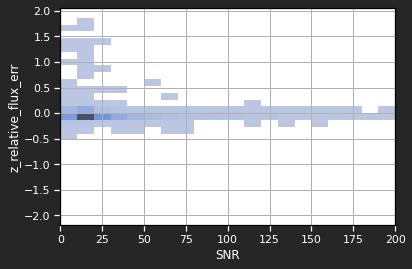

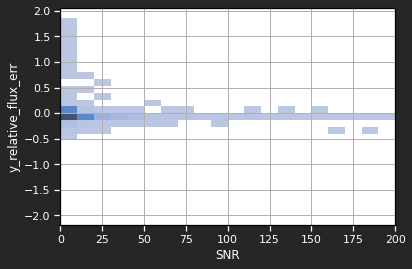

In [21]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,1000,1000/100.0)
    y_bins = np.arange(-2, 2, 4/30.0)
    sns.histplot(x=snr, y=madness_results[band+ "_relative_flux_err"], bins=[x_bins, y_bins], kde=True)
    plt.xlim(0,200)
    plt.xlabel("SNR")
    plt.show()

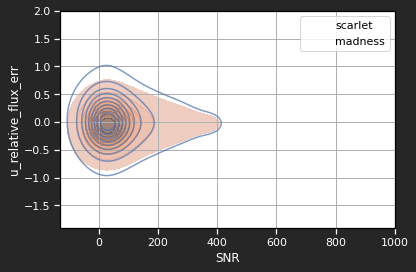

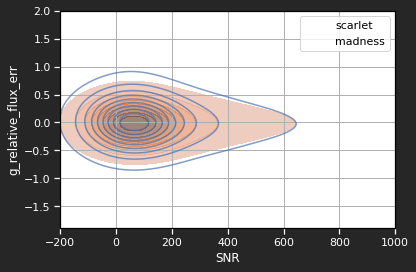

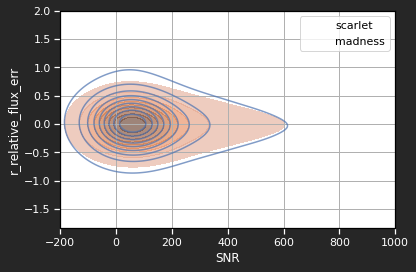

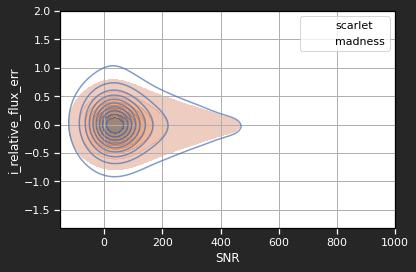

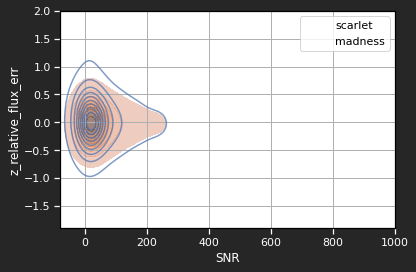

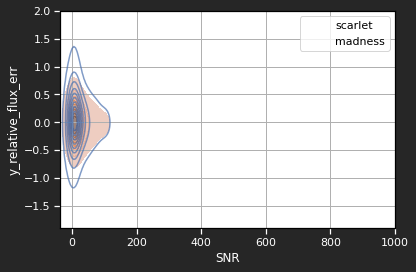

In [94]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    sns.kdeplot(x=snr, y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=True, alpha=.7, label="madness")
    plt.legend()
    plt.xlabel("SNR")
    plt.show()

# Compare with blendedness

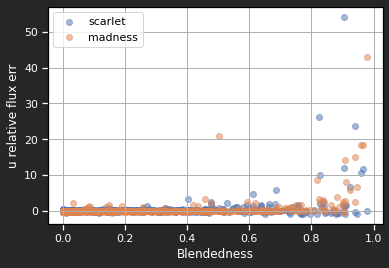

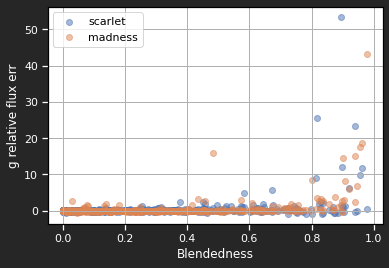

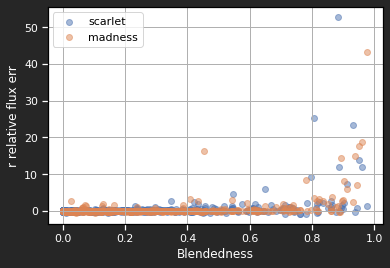

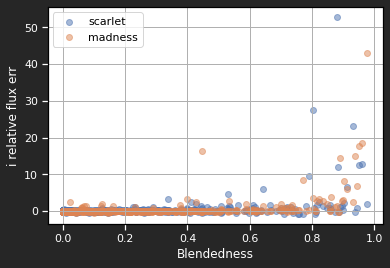

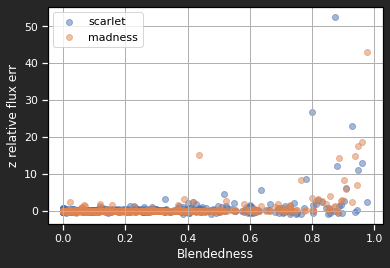

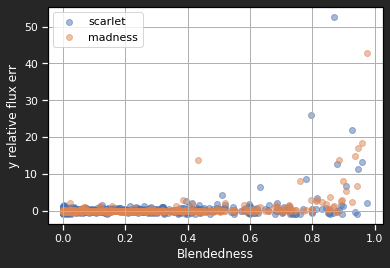

In [95]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    plt.scatter(scarlet_results[band+"_blendedness"], scarlet_results[band+ "_relative_flux_err"], alpha=.5, label="scarlet")
    plt.scatter(madness_results[band+"_blendedness"], madness_results[band+ "_relative_flux_err"], alpha=.5, label="madness")
    plt.xlabel("Blendedness")
    plt.ylabel(band+" relative flux err")
    #sns.kdeplot(x=madness_results[band+"_blendedness"], y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7)
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7
    plt.legend()
    plt.show()

In [24]:
# Validate SNR vs mag 

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,IDENT_1,ra,dec,ref_mag,BAND,WEIGHT,GAL_FILENAME,PSF_FILENAME,GAL_HDU,PSF_HDU,PIXEL_SCALE,NOISE_MEAN,NOISE_VARIANCE,NOISE_FILENAME,stamp_flux,IDENT_2,mag_auto,flux_radius,zphot,sersicfit,bulgefit,fit_status,fit_mad_s,fit_mad_b,fit_dvc_btt,use_bulgefit,viable_sersic,hlr,flux,btk_size,btk_index,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int32,float64,float64,float64,bytes5,float64,bytes32,bytes36,int32,int32,float64,float64,float64,bytes26,float64,int32,float64,float64,float64,float64[8],float64[16],int32[5],float64,float64,float64,int32,int32,float64[3],float64[4],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.998093918572873,8019.623776606022,7085.883155814372,0.054200067329570834,0.9992031244219812,63541.61405108601,58760.16547437757,0.04691214804794841,0.9991806268282102,126119.21168519999,116878.52636445314,0.038946416926827654,0.9990962265240216,93920.59779829171,87758.96279141307,0.036775366817487054,0.9987127515847837,57022.56639733596,52785.73143761605,0.03458912895876143,0.9974449296222554,26547.982953148865,25332.945878617465,0.03392048059767794,0,0.1207228776650977,0,0,114656,12.312215341975133,1.1502970222887008,24.70199966430664,F814W,0.6725800037384033,real_galaxy_images_25.2_n76.fits,real_galaxy_PSF_images_25.2_n76.fits,876,876,0.029999999329447746,-5.195139965508133e-05,7.092030045896536e-06,acs_I_unrot_sci_20_cf.fits,3.378310085448902,114656,24.701932907104492,4.0240960121154785,4.184000015258789,0.05582879926581247 .. 0.7416622479436635,0.002805854688621419 .. 0.7734060231603443,1 .. 1,0.0023845385486783383,0.002530654272385994,0.8283721232425767,0,1,0.04947354509421889 .. 0.0,3.5658033527706183 .. 0.0,0.1207228776650977,70480,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.116431973219923,-0.07524908909087932,-0.07326945036583384,-0.06560472517553241,-0.07430102198833781,-0.04576758530678819
0.9977897475006493,6284.826988666501,5749.278844814398,0.0023850096083715133,0.9995225874581803,49801.08697871733,48772.27107528597,0.002161485659133988,0.999469831468835,98849.0633842485,96811.65509857237,0.001902481750660212,0.9992942291072417,73612.07013379307,72653.0858874321,0.0018699296665447562,0.999169890302267,44691.38578954199,43419.705911073834,0.0018218451051663642,0.9976401930597415,20806.753059104212,20872.71615397185,0.001833733532085824,1,0.15037184379163726,0,0,546191,14.544104257126662,7.114506678623506,24.965999603271484,F814W,0.6588799953460693,real_galaxy_images_25.2_n72.fits,real_galaxy_PSF_images_25.2_n72.fits,888,888,0.029999999329447746,3.3804801205405965e-05,8.221810276154429e-06,acs_I_unrot_sci_20_cf.fits,2.4911146558297332,546191,24.965761184692383,5.012394905090332,0.375900000333786,0.01422813354711827 .. 1.8304365778323326,0.009947950907802027 .. 1.5667242916287258,1 .. 1,0.0019036333782279018,0.0019960239457415523,0.1616823627094316,0,1,0.10823319600470133 .. 0.0,2.7355360417373484 .. 0.0,0.15037184379163726,66808,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,-0.08521286979225726,-0.02065850297345971,-0.020611305923620742,-0.013027540790769407,-0.028454697834984992,0.0031702733569366668
0.9963471310215145,9362.63658057979,8413.94473

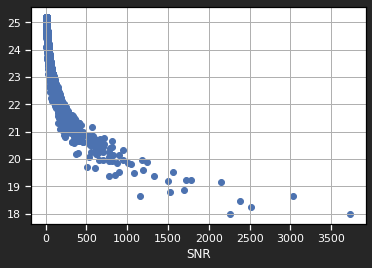

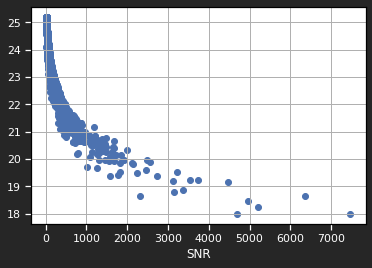

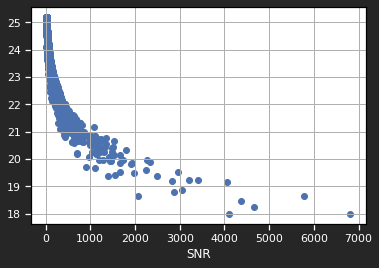

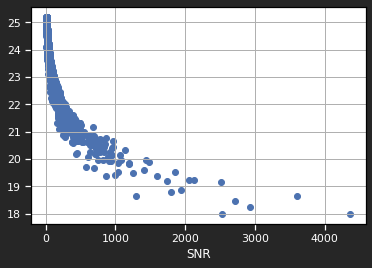

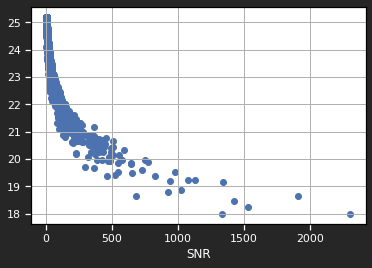

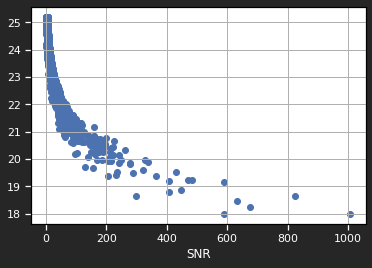

In [101]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    plt.scatter(x=snr, y=madness_results["mag_auto"])
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.xlabel("SNR")
    plt.show()

Plot for u band


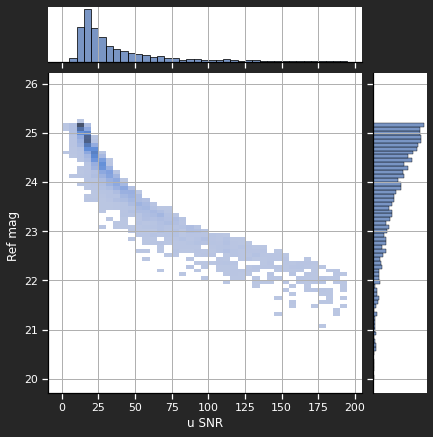

Plot for g band


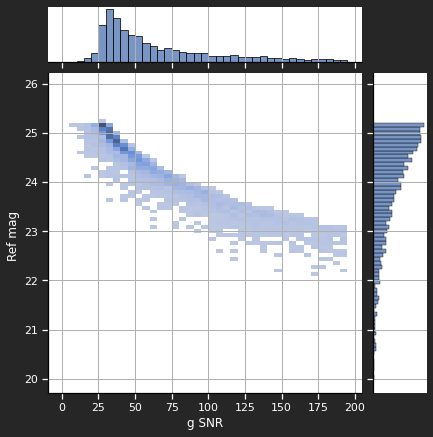

Plot for r band


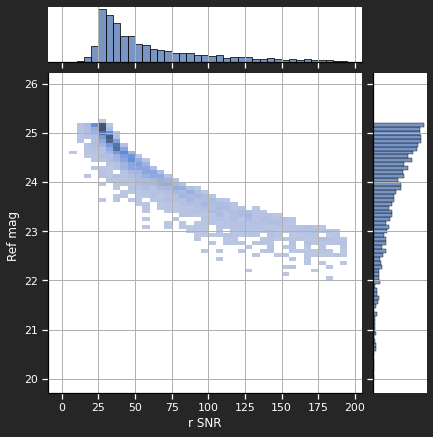

Plot for i band


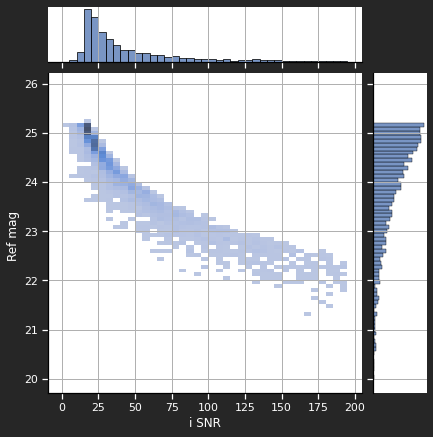

Plot for z band


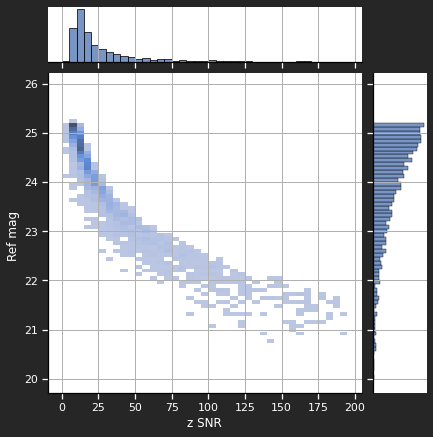

Plot for y band


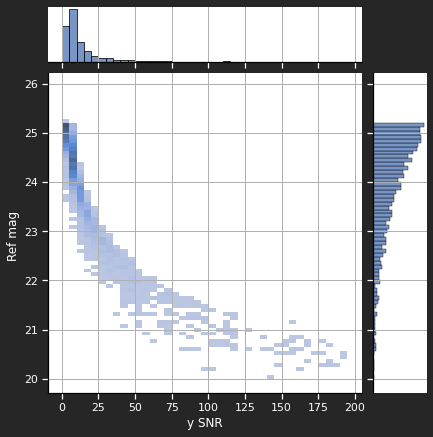

In [111]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    print(f"Plot for {band} band")
    snr = actual_photometry[band+"_flux"].value / actual_photometry[band+"_fluxerrs"].value
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,200,5.0)
    y_bins = np.arange(20, 26, 8/100.0)
    #sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, cbar=True)
    g = sns.JointGrid()
    sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, ax=g.ax_joint)
    g.ax_joint.set_xlabel(band + " SNR")
    g.ax_joint.set_ylabel("Ref mag ")
    sns.histplot(x=snr, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
    sns.histplot(y=madness_results["ref_mag"], ax=g.ax_marg_y, bins=y_bins)
    #ax.set(xlabel='SNR', ylabel='Ref Mag '+band)
    
    plt.show()

In [108]:
np.sum(madness_results['ref_mag']!=madness_results['mag_auto'])

3476